Department of Mathematics and Computer Science, Faculty of Science, Chulalongkorn University

2301648 Architectures of Deep Learning  

First Semester, Saturday 2 March 2024, 8:30 - 12:00

In [ ]:
# Must run this statement first
!pip install --quiet numpy==1.23.1 mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


<font size="30" color="red">You must restart session to continue.</font>

**Instructions**

1. There are 6 questions in this exam.  
2. Type in your Student ID and full name in the box below.  
3. You must not distribute any part of this exam through any other persons. The exam is a government's property. Violators will be prosecuted under a criminal court.  
4. Once the time is expired, student must stop typing.  
5. Any student who does not obey the regulations listed above will receive punishment under the Faculty of Engineering Official Announcement on January 6, 2003 regarding the exam regulations.  

** With implicit evidence or showing intention for cheating, student will receive an F in this course and will receive an academic suspension for 1 semester.**  

**With explicit evidence for cheating, student will receive an F in this course and will receive an academic suspension for 1 year.**  

I acknowledge all instructions above. This exam represents only my own work. I did not give or receive help on this exam.  

Type in your name and date below.  

## &#48;. Type in your student ID and Name here
ID ....................
Name ..............................................

In [ ]:
%matplotlib inline
# DO NOT CHANGE THIS BOX
# Run it to import all necessary libraries
import mxnet as mx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mxnet import nd, autograd
from mxnet.gluon import nn, loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

## &#49;. Deep Learning concept (10 points)

What are different among (1) the perceptron, (2) the multilayer perceptron, and (3) the convolutional neural network? For each model, you must give the mathematical descriptions or MXNet statement to represent them. Then explain it with some examples.  

2 points will be given to the correct mathematical descriptions of each model. (Total of 6 points). 2 points will be given if the different between these three models are described. 2 points will be assign to examples for each model.

### Solution 1. (Your complete solution must type in this box.)


## &#50;. NDArray (10 points)
Given NDArrays: $x_1$, $x_2$, $x_3$, $x_4$, $x_5$, $x_6$, $x_7$ and three constants $m$, $n$, and $k$. Find the expression that would generate the following results. You are not allowed to type any digit in your expression unless it is used for indexing.


In [ ]:
# Must run this box to get all NDArrays and constants.
m, n, k = 4, 5, 7
x_1, x_2, x_3 = nd.array([-2.0]), nd.arange(m), nd.array([[4, -1, 1], [0, 2, 3]])
x_4, x_5, x_6 = nd.ones((k-m,n)), nd.array([4, 0, 1, 2, 3]), nd.ones_like(x_3)
x_7 = nd.array([[[2, 1], [-1, 2]], [[1, 0], [1, -1]]])

In [ ]:
x_1


[-2.]
<NDArray 1 @cpu(0)>

In [ ]:
x_2


[0. 1. 2. 3.]
<NDArray 4 @cpu(0)>

In [ ]:
x_3


[[ 4. -1.  1.]
 [ 0.  2.  3.]]
<NDArray 2x3 @cpu(0)>

In [ ]:
x_4


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 3x5 @cpu(0)>

In [ ]:
x_5


[4. 0. 1. 2. 3.]
<NDArray 5 @cpu(0)>

In [ ]:
x_6


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [ ]:
x_7


[[[ 2.  1.]
  [-1.  2.]]

 [[ 1.  0.]
  [ 1. -1.]]]
<NDArray 2x2x2 @cpu(0)>

In [ ]:
# 2.1. The expression to generate
# [[ 8. -2.  2.]
#  [ 0.  4.  6.]]
#<NDArray 2x3 @cpu(0)>
# is
x_3 * x_3[1,1]


[[ 8. -2.  2.]
 [ 0.  4.  6.]]
<NDArray 2x3 @cpu(0)>

In [ ]:
# 2.2. The expression to generate
# [[6.  1.  3.]
#  [2.  4.  5.]]
#<NDArray 2x3 @cpu(0)>
# is
x_3 + x_3[1,1]


[[6. 1. 3.]
 [2. 4. 5.]]
<NDArray 2x3 @cpu(0)>

In [ ]:
# 2.3. The expression to multiply two ndarrays (Using .as_np_ndarray() to transform it to use with mx.np.matmul)
# [[4., 4., 4., 4., 4.],
#  [5., 5., 5., 5., 5.]]
# <NDArray 2x5 @cpu(0)>
# is



[[4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]]
<NDArray 2x5 @cpu(0)>

In [ ]:
x_2_np[1:3].reshape((-1,1))

array([[1.],
       [2.]])

In [ ]:
x_6_np = x_6.as_np_ndarray()
x_4_np = x_4.as_np_ndarray()
x_2_np = x_2.as_np_ndarray()
result = np.matmul(x_6_np, x_4_np) + x_2_np[1:3].reshape((-1,1))
result

array([[4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.]])

In [ ]:
# 2.4. The expression to generate
# [[[[ 0.]
#    [ 0.]
#    [ 0.]
#    [ 0.]
#    [ 0.]]]
#  [[[ 4.]
#    [ 0.]
#    [ 1.]
#    [ 2.]
#    [ 3.]]]
#  [[[ 8.]
#    [ 0.]
#    [ 2.]
#    [ 4.]
#    [ 6.]]]
#  [[[12.]
#    [ 0.]
#    [ 3.]
#    [ 6.]
#    [ 9.]]]]
# <NDArray 4x1x5x1 @cpu(0)>
# is



[[[[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 4.]
   [ 0.]
   [ 1.]
   [ 2.]
   [ 3.]]]


 [[[ 8.]
   [ 0.]
   [ 2.]
   [ 4.]
   [ 6.]]]


 [[[12.]
   [ 0.]
   [ 3.]
   [ 6.]
   [ 9.]]]]
<NDArray 4x1x5x1 @cpu(0)>

In [ ]:
# 2.5. The expression to generate
# [[[-16.   0. -10.]
#   [  8. -10. -10.]]
#
#  [[ -8.   2.  -2.]
#   [ -8.   6.   4.]]]
# <NDArray 2x2x3 @cpu(0)>
# is



[[[-16.   0. -10.]
  [  8. -10. -10.]]

 [[ -8.   2.  -2.]
  [ -8.   6.   4.]]]
<NDArray 2x2x3 @cpu(0)>

## &#51;. Naïve Bayes (10 points)

The USPS digits dataset or simply USPS dataset is a collection of handwritten digits collected from US postal service. It is commonly used as a benchmark dataset in machine learning and pattern recognition research, particularly for tasks related to digit recognition or classification.

The dataset consists of grayscale images of handwritten digits from 0 to 9. The images are of size 16x16 pixels.

In [ ]:
# DO NOT CHANGE THIS BOX
# Download and load the USPS dataset
usps = fetch_openml('usps', version=2, data_home='.')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Transform features and target
# Need to transform X and y appropriately
X, y = usps.data, usps.target

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Transform to NDArray
X_train_mx, X_test_mx = nd.array(X_train), nd.array(X_test)
y_train_mx, y_test_mx = nd.array(y_train), nd.array(y_test)

In [ ]:
X_train_mx[0]*-1


[ 1.        1.        0.999991  0.999102  0.973345  0.719918  0.111103
  0.005652  0.656341  0.970748  0.994381  0.942661  0.854142  0.911566
  0.981999  0.998964  1.        1.        0.999933  0.995066  0.908984
  0.433516 -0.386894 -0.339835  0.557768  0.959094  0.964375  0.736102
  0.405695  0.643099  0.92624   0.995727  1.        0.999993  0.99938
  0.979795  0.760357  0.071274 -0.538563 -0.176287  0.658883  0.96517
  0.864492  0.364123 -0.119492  0.340956  0.858014  0.99162   0.999998
  0.999799  0.992972  0.903512  0.461992 -0.308998 -0.439492  0.255182
  0.834841  0.946263  0.642277 -0.109225 -0.43479   0.224189  0.832744
  0.990088  0.999958  0.997208  0.948173  0.649846 -0.039673 -0.492903
 -0.070086  0.650673  0.941441  0.827704  0.24692  -0.486308 -0.410393
  0.403931  0.896234  0.994342  0.999567  0.984463  0.806196  0.203125
 -0.463273 -0.349912  0.409345  0.882694  0.926812  0.548388 -0.255608
 -0.577612 -0.029078  0.69375   0.965959  0.998599  0.997393  0.943512
  0.566

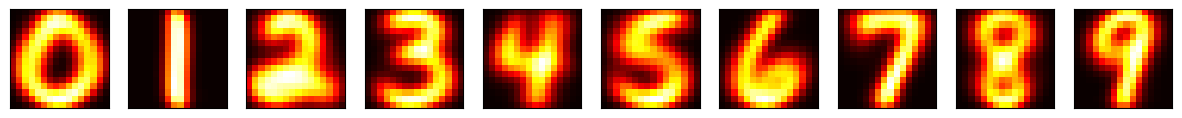


[0.16692238 0.13639154 0.09987726 0.08867751 0.09159251 0.07701749
 0.08975146 0.08514882 0.07625038 0.08837067]
<NDArray 10 @cpu(0)>


In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

# Code for building Naive Bayes
# Initialize the count statistics for p(y) and p(x_i|y)
# Initialize all numbers with a count of 1 to ensure
# no zero division, call this Laplace smoothing.
ycount = nd.ones(shape=(xx))
xcount = nd.ones(shape=(xxx, xx))
for i in range(len(X_train_mx)):
    x = X_train_mx[i].reshape((xxx,))
    y = int(y_train_mx[i].asscalar())
    ycount[y] += 1
    xcount[:, y] += x
for i in range(10):
    xcount[:, i] = xcount[:, i]/ycount[i]
py = ycount / nd.sum(ycount)

fig, figarr = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((xx, xx)).asnumpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)
plt.show()
print(py)

In [ ]:
# DO NOT CHANGE THIS BOX
px = xcount
print(px)


[[0.00215255 0.00112486 0.01019217 ... 0.02502297 0.00671088 0.00212635]
 [0.005289   0.00112486 0.03002939 ... 0.06644479 0.02017692 0.00385446]
 [0.01586523 0.00112613 0.06701548 ... 0.12914951 0.05329801 0.01019015]
 ...
 [0.02425583 0.00188609 0.12443396 ... 0.00195336 0.01259392 0.00347565]
 [0.00619167 0.00133937 0.08563295 ... 0.00180939 0.00398494 0.0021087 ]
 [0.00171074 0.00116585 0.03956724 ... 0.0018019  0.00220427 0.00179709]]
<NDArray 256x10 @cpu(0)>


In [ ]:
# DO NOT CHANGE THIS BOX

logpx = nd.log(px)
logpxneg = nd.log(1-px)
logpy = nd.log(py)

def bayespost(data):
    # we need to incorporate the prior probability p(y) since p(y|x) is
    # proportional to p(x|y) p(y)
    logpost = logpy.copy()
    logpost += (logpx * data + logpxneg * (1-data)).sum(0)
    # normalize to prevent overflow or underflow by subtracting the largest
    # value
    logpost -= nd.max(logpost)
    # and compute the softmax using logpx
    post = nd.exp(logpost).asnumpy()
    post /= np.sum(post)
    return post

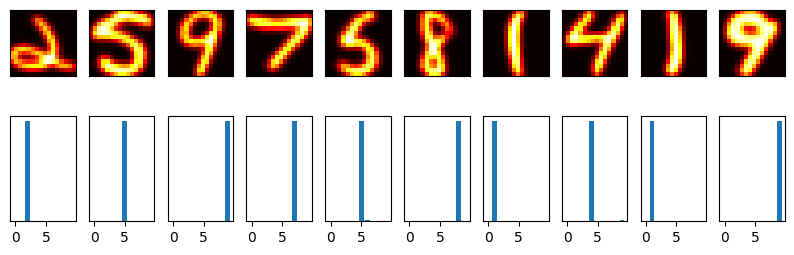

In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

fig, figarr = plt.subplots(2, 10, figsize=(10, 3))
ctr = 0
for i in range(len(X_test_mx)):
    x = X_test_mx[i].reshape((xxx,1))
    y = int(y_test_mx[i].asscalar())
    post = bayespost(x)
    figarr[1, ctr].bar(range(10), post)
    figarr[1, ctr].axes.get_yaxis().set_visible(False)
    figarr[0, ctr].imshow(x.reshape((xx, xx)).asnumpy(), cmap='hot')
    figarr[0, ctr].axes.get_xaxis().set_visible(False)
    figarr[0, ctr].axes.get_yaxis().set_visible(False)
    ctr += 1
    if ctr == 10: break
plt.show()

In [ ]:
# DO NOT CHANGE THIS BOX
# Initialize counter and error
ctr, err = 0, 0
for i in range(len(X_test_mx)):
    ctr += 1
    x = X_test_mx[i].reshape((256,1))
    y = int(y_test_mx[i].asscalar())
    post = bayespost(x)
    if (post[y] < post.max()):
        err += 1
print('Naive Bayes has an error rate of', err/ctr)

Naive Bayes has an error rate of 0.15197132616487455


## &#52;. Multiple Regression

Consider Communities and Crime dataset within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.
It contains 1 goal attribute and 128 attributes:

1.   @attribute state numeric  
2.   @attribute county numeric  
3.   @attribute community numeric  
4.   @attribute communityname string  
5.   @attribute fold numeric  
6.   @attribute population numeric  
7.   @attribute householdsize numeric  
8.   @attribute racepctblack numeric  
9.   @attribute racePctWhite numeric  
10.  @attribute racePctAsian numeric  
11.  @attribute racePctHisp numeric  
12.  @attribute agePct12t21 numeric  
13.  @attribute agePct12t29 numeric  
14.  @attribute agePct16t24 numeric  
15.  @attribute agePct65up numeric  
16.  @attribute numbUrban numeric  
17.  @attribute pctUrban numeric  
18.  @attribute medIncome numeric  
19.  @attribute pctWWage numeric  
20.  @attribute pctWFarmSelf numeric  
21.  @attribute pctWInvInc numeric  
22.  @attribute pctWSocSec numeric  
23.  @attribute pctWPubAsst numeric  
24.  @attribute pctWRetire numeric  
25.  @attribute medFamInc numeric  
26.  @attribute perCapInc numeric  
27.  @attribute whitePerCap numeric  
28.  @attribute blackPerCap numeric  
29.  @attribute indianPerCap numeric  
30.  @attribute AsianPerCap numeric  
31.  @attribute OtherPerCap numeric  
32.  @attribute HispPerCap numeric  
33.  @attribute NumUnderPov numeric  
34.  @attribute PctPopUnderPov numeric  
35.  @attribute PctLess9thGrade numeric  
36.  @attribute PctNotHSGrad numeric  
37.  @attribute PctBSorMore numeric  
38.  @attribute PctUnemployed numeric  
39.  @attribute PctEmploy numeric  
40.  @attribute PctEmplManu numeric  
41.  @attribute PctEmplProfServ numeric  
42.  @attribute PctOccupManu numeric  
43.  @attribute PctOccupMgmtProf numeric  
44.  @attribute MalePctDivorce numeric  
45.  @attribute MalePctNevMarr numeric  
46.  @attribute FemalePctDiv numeric  
47.  @attribute TotalPctDiv numeric  
48.  @attribute PersPerFam numeric  
49.  @attribute PctFam2Par numeric  
50.  @attribute PctKids2Par numeric  
51.  @attribute PctYoungKids2Par numeric  
52.  @attribute PctTeen2Par numeric  
53.  @attribute PctWorkMomYoungKids numeric  
54.  @attribute PctWorkMom numeric  
55.  @attribute NumIlleg numeric   
56.  @attribute PctIlleg numeric  
57.  @attribute NumImmig numeric  
58.  @attribute PctImmigRecent numeric  
59.  @attribute PctImmigRec5 numeric  
60.  @attribute PctImmigRec8 numeric  
61.  @attribute PctImmigRec10 numeric  
62.  @attribute PctRecentImmig numeric  
63.  @attribute PctRecImmig5 numeric  
64.  @attribute PctRecImmig8 numeric  
65.  @attribute PctRecImmig10 numeric  
66.  @attribute PctSpeakEnglOnly numeric  
67.  @attribute PctNotSpeakEnglWell numeric  
68.  @attribute PctLargHouseFam numeric  
69.  @attribute PctLargHouseOccup numeric  
70.  @attribute PersPerOccupHous numeric  
71.  @attribute PersPerOwnOccHous numeric  
72.  @attribute PersPerRentOccHous numeric  
73.  @attribute PctPersOwnOccup numeric  
74.  @attribute PctPersDenseHous numeric  
75.  @attribute PctHousLess3BR numeric  
76.  @attribute MedNumBR numeric  
77.  @attribute HousVacant numeric  
78.  @attribute PctHousOccup numeric  
79.  @attribute PctHousOwnOcc numeric  
80.  @attribute PctVacantBoarded numeric  
81.  @attribute PctVacMore6Mos numeric  
82.  @attribute MedYrHousBuilt numeric  
83.  @attribute PctHousNoPhone numeric  
84.  @attribute PctWOFullPlumb numeric  
85.  @attribute OwnOccLowQuart numeric  
86.  @attribute OwnOccMedVal numeric  
87.  @attribute OwnOccHiQuart numeric  
88.  @attribute RentLowQ numeric  
89.  @attribute RentMedian numeric  
90.  @attribute RentHighQ numeric  
91.  @attribute MedRent numeric  
92.  @attribute MedRentPctHousInc numeric  
93.  @attribute MedOwnCostPctInc numeric  
94.  @attribute MedOwnCostPctIncNoMtg numeric  
95.  @attribute NumInShelters numeric  
96.  @attribute NumStreet numeric  
97.  @attribute PctForeignBorn numeric  
98.  @attribute PctBornSameState numeric  
99.  @attribute PctSameHouse85 numeric  
100. @attribute PctSameCity85 numeric  
101. @attribute PctSameState85 numeric  
102. @attribute LemasSwornFT numeric  
103. @attribute LemasSwFTPerPop numeric  
104. @attribute LemasSwFTFieldOps numeric  
105. @attribute LemasSwFTFieldPerPop numeric  
106. @attribute LemasTotalReq numeric  
107. @attribute LemasTotReqPerPop numeric  
108. @attribute PolicReqPerOffic numeric  
109. @attribute PolicPerPop numeric  
110. @attribute RacialMatchCommPol numeric  
111. @attribute PctPolicWhite numeric  
112. @attribute PctPolicBlack numeric  
113. @attribute PctPolicHisp numeric  
114. @attribute PctPolicAsian numeric  
115. @attribute PctPolicMinor numeric  
116. @attribute OfficAssgnDrugUnits numeric  
117. @attribute NumKindsDrugsSeiz numeric  
118. @attribute PolicAveOTWorked numeric  
119. @attribute LandArea numeric  
120. @attribute PopDens numeric  
121. @attribute PctUsePubTrans numeric  
122. @attribute PolicCars numeric  
123. @attribute PolicOperBudg numeric  
124. @attribute LemasPctPolicOnPatr numeric  
125. @attribute LemasGangUnitDeploy numeric  
126. @attribute LemasPctOfficDrugUn numeric  
127. @attribute PolicBudgPerPop numeric  
128. @attribute ViolentCrimesPerPop numeric  


There are missing values.

You must implement the multiple regression using SGD from our class.
- The total 10 points will give to a student who can find the parameters of this regression and achieve 0.01 for the average square loss.
- The total 8 points will give to a student who can find the parameters of this regression and achieve 0.05 for the average square loss.
- The total 6 points will give to a student who can find the parameters of this regression and achieve 0.1 for the average square loss.
- The total 5 points will give to a student who can make this code work with this dataset.


In [ ]:
# DO NOT CHANGE THIS BOX
# Download dataset and unzip
!wget https://archive.ics.uci.edu/static/public/183/communities+and+crime.zip
!unzip communities+and+crime.zip

--2024-03-01 05:51:57--  https://archive.ics.uci.edu/static/public/183/communities+and+crime.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘communities+and+crime.zip’

communities+and+cri     [  <=>               ] 264.69K  1004KB/s    in 0.3s    

2024-03-01 05:51:57 (1004 KB/s) - ‘communities+and+crime.zip’ saved [271040]

Archive:  communities+and+crime.zip
  inflating: communities.data        
  inflating: communities.names       


In [ ]:
# DO NOT CHANGE THIS BOX
# Read data and set column names.
filename = "communities.data"
df = pd.read_csv(filename, header=None)
df.columns = ["state", "county", "community", "communityname", "fold", "population",
"householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
"agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban",
"medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
"pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap",
"AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
"PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
"PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
"MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par",
"PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg",
"PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
"PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly",
"PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous",
"PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous",
"PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc",
"PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb",
"OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ",
"MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters",
"NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
"PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
"LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
"PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
"PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz",
"PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
"LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop",
"ViolentCrimesPerPop"]

In [ ]:
# DO NOT CHANGE THIS BOX
# Need to drop column with some missing values
ColumnDrops = ['county', 'community', 'communityname', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
               'PolicBudgPerPop', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
               'PolicPerPop','RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'OtherPerCap',
               'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
               'LemasSwornFT', 'LemasSwFTPerPop']
for col in ColumnDrops:
  df = df.drop(col, axis=1)
df.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

# We will need to process this text dataset using pandas
# Keeping only continuous variables and scale each column to be in [0, 1]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
df.loc[:,:] = scaled_values

# Get attributes and target
num_inputs, num_outputs = xxx, xx
X = mx.nd.array(df.drop(['ViolentCrimesPerPop'], axis=1))
y = mx.nd.array(df['ViolentCrimesPerPop'])
num_examples = len(y)
print(num_examples)

1994


In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

## Update this code to build the multiple regression the last epoch must have average square loss less than 0.001
# Build multiple regression from ground-up
mx.random.seed(1)
batch_size = xx
train_data = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)

w = nd.random_normal(loc=0, scale=1, shape=(num_inputs, num_outputs))
b = nd.random_normal(shape=num_outputs)
params = [w, b]
for param in params:
    param.attach_grad()
def net(X):
    return mx.nd.dot(X, w) + b
def square_loss(yhat, y):
    return nd.mean((yhat - y)**2)
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad
num_batches = num_examples/batch_size

In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

epochs, learning_rate = xxx, xx
for e in range(epochs):
    cumulative_loss = 0.0
    # inner loop
    for data, label in train_data:
        label = label.reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    if e%200==0:
      print("The cumulative loss of epoch %3d is %10.8f"%(e, cumulative_loss / num_batches))

The cumulative loss of epoch   0 is 1.60320066
The cumulative loss of epoch 200 is 0.11181477
The cumulative loss of epoch 400 is 0.10555065
The cumulative loss of epoch 600 is 0.10020455
The cumulative loss of epoch 800 is 0.09878540
The cumulative loss of epoch 1000 is 0.09908978
The cumulative loss of epoch 1200 is 0.09820114
The cumulative loss of epoch 1400 is 0.09923699
The cumulative loss of epoch 1600 is 0.09821831
The cumulative loss of epoch 1800 is 0.09923270
The cumulative loss of epoch 2000 is 0.10225643


The cumulative loss of epoch   0 is 0.09066828
The cumulative loss of epoch 100 is 0.08711926
The cumulative loss of epoch 200 is 0.08729746
The cumulative loss of epoch 300 is 0.08725504
The cumulative loss of epoch 400 is 0.08719487
The cumulative loss of epoch 500 is 0.08690993
The cumulative loss of epoch 600 is 0.08727646
The cumulative loss of epoch 700 is 0.08687309
The cumulative loss of epoch 800 is 0.08699187
The cumulative loss of epoch 900 is 0.08709959
The cumulative loss of epoch 1000 is 0.08713880


## &#53;. Softmax regression (10 points)

You will use the multiclass logistic (softmax) regression to solve usps dataset.

You can use mxnet.gluon from our class.

- The total 10 points will give to a student who can find the parameters of this perceptron achieving more than 95% testing accuracy.
- The total 8 points will give to a student who can find the parameters of this perceptron achieving more than 90% testing accuracy.
- The total 6 points will give to a student who can find the parameters of this perceptron achieving more than 80% testing accuracy.
- The total 5 points will give to a student who can make this code work with this dataset.



In [ ]:
# Update preprocessing here
# Download and preprocess the USPS dataset
usps = fetch_openml('usps', version=2, data_home='.')
usps.data = usps.data
usps.target = usps.target

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(usps.data, usps.target, test_size=0.3, random_state=1, stratify=usps.target)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
######################################
# Replace xx with appropriate values #
######################################

batch_size = xx
train_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X_train.to_numpy(), y_train.to_numpy()), batch_size=batch_size, shuffle=True)
test_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X_test.to_numpy(), y_test.to_numpy()), batch_size=len(y_test), shuffle=False)

In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

# Set the number of inputs, the number of outputs
num_inputs, num_outputs = xxx, xx
W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)
W.attach_grad()
b.attach_grad()

In [ ]:
# DO NOT CHANGE THIS BOX
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition  # The broadcast mechanism is applied here.
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)
def cross_entropy(y_hat, y):
    return - nd.pick(y_hat, y).log()

In [ ]:
# DO NOT CHANGE THIS BOX
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [ ]:
# Before training check the accuracy of the random network on Test
evaluate_accuracy(test_iter, net)

0.07060931899641577

In [ ]:
# DO NOT CHANGE THIS BOX
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [ ]:
# DO NOT CHANGE THIS BOX
def train(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################

# First training using the high learning rate
num_epochs, lr = xxx, xx
train(net, train_iter, test_iter, cross_entropy, num_epochs,batch_size, [W, b], lr)

epoch 1, loss 0.8323, train acc 0.819, test acc 0.897
epoch 2, loss 0.4166, train acc 0.904, test acc 0.917
epoch 3, loss 0.3452, train acc 0.917, test acc 0.924
epoch 4, loss 0.3107, train acc 0.922, test acc 0.925
epoch 5, loss 0.2896, train acc 0.927, test acc 0.930
epoch 6, loss 0.2754, train acc 0.929, test acc 0.927
epoch 7, loss 0.2650, train acc 0.931, test acc 0.935
epoch 8, loss 0.2568, train acc 0.933, test acc 0.933
epoch 9, loss 0.2496, train acc 0.934, test acc 0.935
epoch 10, loss 0.2440, train acc 0.936, test acc 0.937
epoch 11, loss 0.2393, train acc 0.937, test acc 0.937
epoch 12, loss 0.2349, train acc 0.937, test acc 0.938
epoch 13, loss 0.2312, train acc 0.938, test acc 0.939
epoch 14, loss 0.2273, train acc 0.939, test acc 0.938
epoch 15, loss 0.2246, train acc 0.939, test acc 0.939
epoch 16, loss 0.2214, train acc 0.942, test acc 0.939
epoch 17, loss 0.2192, train acc 0.942, test acc 0.942
epoch 18, loss 0.2169, train acc 0.944, test acc 0.942
epoch 19, loss 0.21

epoch 1, loss 0.2093, train acc 0.945, test acc 0.942
epoch 2, loss 0.2091, train acc 0.945, test acc 0.942
epoch 3, loss 0.2089, train acc 0.945, test acc 0.942
epoch 4, loss 0.2087, train acc 0.945, test acc 0.943
epoch 5, loss 0.2085, train acc 0.945, test acc 0.943
epoch 6, loss 0.2084, train acc 0.945, test acc 0.943
epoch 7, loss 0.2083, train acc 0.946, test acc 0.943
epoch 8, loss 0.2082, train acc 0.946, test acc 0.943
epoch 9, loss 0.2081, train acc 0.946, test acc 0.944
epoch 10, loss 0.2080, train acc 0.946, test acc 0.944


## &#54;. Multilayer perceptron (10 points)

You must use the multilayer perceptron to solve the usps dataset

You can use mxnet.gluon from our class.
- The total 10 points will give to a student who can find the parameters of this perceptron achieving more than 99% testing accuracy.
- The total 8 points will give to a student who can find the parameters of this perceptron achieving more than 95% testing accuracy.
- The total 6 points will give to a student who can find the parameters of this perceptron achieving more than 90% testing accuracy.
- The total 5 points will give to a student who can make this code work with this dataset.



In [ ]:
# DO NOT CHANGE THIS BOX
def evaluate_accuracy(data_iter, net):
    acc_sum, n = nd.array([0]), 0
    for X, y in data_iter:
        # If ctx is the GPU, copy the data to the GPU.
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.size
    return acc_sum.asscalar() / n

In [ ]:
# Perform data preprocessing for usps
#######################################
# Replace xxx with appropriate values #
#######################################

# Import Dataset from scikit-learn
# Download and preprocess the USPS dataset
usps = fetch_openml('usps', version=2, data_home='.')
usps.data = usps.data
usps.target = usps.target

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(usps.data, usps.target, test_size=0.3, random_state=1, stratify=usps.target)

batch_size = xxx
train_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X_train.to_numpy(), y_train.to_numpy()), batch_size=batch_size, shuffle=True)
test_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X_test.to_numpy(), y_test.to_numpy()), batch_size=len(y_test), shuffle=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
###########################################
# Replace xx, xxx with appropriate values #
###########################################
# Update this MLP
class MLP(nn.Block):
  def __init__(self, **kwargs):
    super(MLP, self).__init__(**kwargs)
    self.linear1 = nn.Dense(xx, activation="relu")
    self.linear4 = nn.Dense(xx, activation="sigmoid")

  def forward(self, x):
    x = self.linear1(x)
    return self.linear4(x)

model = MLP()
model.initialize(mx.init.Xavier())

learning_rate = xxx

# Define the loss function
loss_fn = mx.gluon.loss.SoftmaxCrossEntropyLoss()
trainer = mx.gluon.Trainer(model.collect_params(), "adam", {"learning_rate":learning_rate})

In [ ]:
#######################################
# Replace xxx with appropriate values #
#######################################
# Training
num_epochs = xxx
for epoch in range(num_epochs):
    train_loss, train_acc = 0, 0
    for data, label in train_iter:
        with autograd.record():
            output = model(data)
            loss = loss_fn(output, label)
        loss.backward()
        trainer.step(data.shape[0])
        train_loss += loss.mean().asscalar()
        train_acc += (output.argmax(axis=1) == label.astype('float32')).mean().asscalar()
    test_acc = evaluate_accuracy(test_iter, model)
    if (epoch+1)%50==0:
      print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss / len(train_iter):.4f}, Train accuracy: {train_acc / len(train_iter):.4f}, Test accuracy: {test_acc:.4f}")


Epoch [50/1000], Loss: 1.5235, Train accuracy: 0.9368, Test accuracy: 0.9297
Epoch [100/1000], Loss: 1.4989, Train accuracy: 0.9584, Test accuracy: 0.9434
Epoch [150/1000], Loss: 1.4909, Train accuracy: 0.9615, Test accuracy: 0.9473
Epoch [200/1000], Loss: 1.4860, Train accuracy: 0.9670, Test accuracy: 0.9502
Epoch [250/1000], Loss: 1.4834, Train accuracy: 0.9690, Test accuracy: 0.9530
Epoch [300/1000], Loss: 1.4817, Train accuracy: 0.9691, Test accuracy: 0.9523
Epoch [350/1000], Loss: 1.4799, Train accuracy: 0.9710, Test accuracy: 0.9548
Epoch [400/1000], Loss: 1.4793, Train accuracy: 0.9723, Test accuracy: 0.9548
Epoch [450/1000], Loss: 1.4792, Train accuracy: 0.9723, Test accuracy: 0.9559
Epoch [500/1000], Loss: 1.4783, Train accuracy: 0.9742, Test accuracy: 0.9545
Epoch [550/1000], Loss: 1.4772, Train accuracy: 0.9752, Test accuracy: 0.9559
Epoch [600/1000], Loss: 1.4774, Train accuracy: 0.9741, Test accuracy: 0.9563
Epoch [650/1000], Loss: 1.4768, Train accuracy: 0.9752, Test accu